## ANIMAL DETECTOR

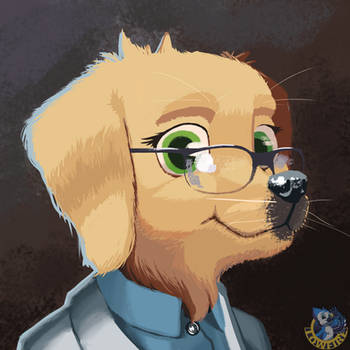

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as imglib
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix #depreciated
from sklearn.svm import SVC
from sklearn import svm
from PIL import Image
import os

In [ ]:
train_data = os.listdir("/content/drive/MyDrive/Animals")
train_data

['cat', 'dog', 'fox']

In [ ]:
X=[]
y=[]
for index,img_type in enumerate(train_data):
  print(img_type)
  p = os.path.join('/content/drive/MyDrive/Animals/', img_type+"/")
  list1 = os.listdir(p)
  for file1 in list1:
    #l_st = len(str(i))
    #st = '('+str(i)+')'
    #img = imglib.imread('/content/drive/MyDrive/Data/Car logo/'+img_type+st+'.jpg')
    #img = .open('/content/drive/MyDrive/Animals/'+img_type+"/"+ img_type +" "+ st+'.jpg')
    #img = img.convert('L') # turns color pictures to b&w
    #data=np.array(img.getdata())
    p2 = os.path.join(p, file1)
    img = imglib.imread(p2)
    X.append(img)
    y.append(index)
X = np.array(X)
y = np.array(y)
print(X.shape,y.shape)

cat
dog
fox
(300, 512, 512, 3) (300,)


In [ ]:
X = X / 255
X[0]

array([[[0.00133795, 0.00098424, 0.00086121],
        [0.0014456 , 0.00109189, 0.00096886],
        [0.00150711, 0.00116878, 0.00099962],
        ...,
        [0.00066128, 0.00046136, 0.00032295],
        [0.00067666, 0.00052288, 0.00038447],
        [0.00069204, 0.00055363, 0.00041522]],

       [[0.00130719, 0.00095348, 0.00083045],
        [0.00141484, 0.00106113, 0.0009381 ],
        [0.00147636, 0.00113802, 0.00096886],
        ...,
        [0.0007228 , 0.00052288, 0.00038447],
        [0.00067666, 0.00052288, 0.00038447],
        [0.00064591, 0.0005075 , 0.00036909]],

       [[0.00127643, 0.00092272, 0.00079969],
        [0.00138408, 0.00104575, 0.00087659],
        [0.00143022, 0.00109189, 0.00092272],
        ...,
        [0.00061515, 0.00041522, 0.0002922 ],
        [0.00058439, 0.0004306 , 0.0002922 ],
        [0.00056901, 0.00041522, 0.00027682]],

       ...,

       [[0.00058439, 0.0002153 , 0.00041522],
        [0.00076894, 0.00044598, 0.00058439],
        [0.00073818, 0

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=41)
print("train: ", X_train.shape, y_train.shape)
print("test:  " , X_test.shape, y_test.shape)


train:  (240, 512, 512, 3) (240,)
test:   (60, 512, 512, 3) (60,)


In [ ]:
X[0].shape

(512, 512, 3)

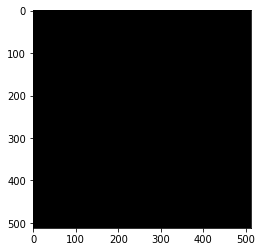

In [ ]:
plt.imshow(X[0])

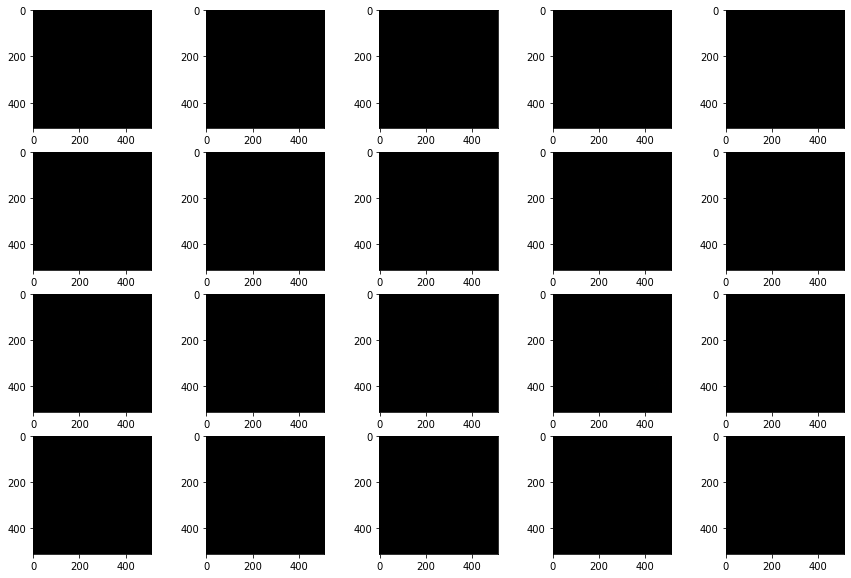

In [ ]:
plt.figure(figsize=(15, 10))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.grid(False)
    plt.imshow(X[i+100])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


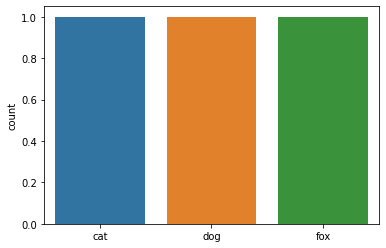

In [ ]:
sns.countplot(train_data)

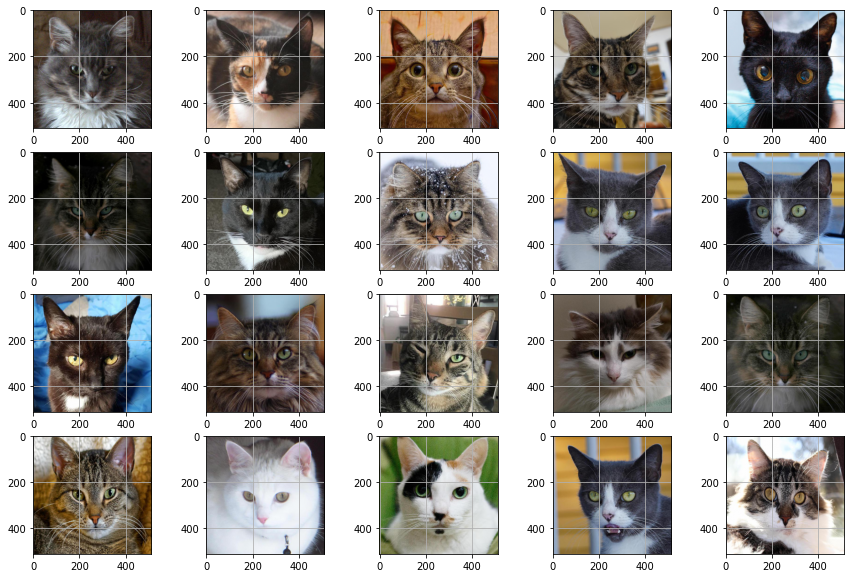

In [ ]:
plt.figure(figsize=(15, 10))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.grid(True)
    plt.imshow(X[i])
plt.show()

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(512, 512, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(50, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 510, 510, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 255, 255, 64)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 253, 253, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 126, 126, 64)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 124, 124, 64)      36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 62, 62, 64)      

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=100,validation_split=0.1)
print('\ncalculating test accuracy:')


Epoch 1/100
7/7 [==============================] - 3s 380ms/step - loss: 1.1165 - accuracy: 0.3426 - val_loss: 1.1038 - val_accuracy: 0.5000
Epoch 2/100
7/7 [==============================] - 3s 364ms/step - loss: 1.1181 - accuracy: 0.2778 - val_loss: 1.1390 - val_accuracy: 0.2083
Epoch 3/100
7/7 [==============================] - 3s 369ms/step - loss: 1.1145 - accuracy: 0.3611 - val_loss: 1.1099 - val_accuracy: 0.2083
Epoch 4/100
7/7 [==============================] - 3s 368ms/step - loss: 1.1122 - accuracy: 0.2963 - val_loss: 1.1041 - val_accuracy: 0.2917
Epoch 5/100
7/7 [==============================] - 3s 368ms/step - loss: 1.1001 - accuracy: 0.3611 - val_loss: 1.1440 - val_accuracy: 0.2083
Epoch 6/100
7/7 [==============================] - 3s 368ms/step - loss: 1.1069 - accuracy: 0.3611 - val_loss: 1.1519 - val_accuracy: 0.2083
Epoch 7/100
7/7 [==============================] - 3s 367ms/step - loss: 1.1007 - accuracy: 0.3009 - val_loss: 1.1007 - val_accuracy: 0.2083
Epoch 8/100
7

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)


2/2 [==============================] - 0s 149ms/step - loss: 1.2275 - accuracy: 0.8667
